# Laboratory work 3.7.2

### Monochromator.

Objectives:
1. Plot your first set of measurements of angles m for the know values of lambda. Draw a
smooth curved line through the data points. You do not have to do a mathematical
calculation for the line. Just use your judgement for what is the best fit and draw it “by
hand”. It might be the case that a data point or two are not on the line.
Determining lambda from the plot
2. Use your plot to read o values of lambda for the 5 spectral lines for which you measured
m without knowing the lambda values.
3. In each case estimate (no calculation needed) the error in lambda. Could the plot line
actually go more to one side or the other, higher or lower? Approximately by how much
would the value of lambda then change? You do not need to write these considerations.
Just assign an error to each value of lambda. Is it ±1 [nm], ±5 [nm], ±10 [nm]?
4. For each of the lines look up the know value of lambda and list it in a separate column.
Conclusions
5. Compare your obtained values of lambda to the known values. Do the known values fall
in the error range of your determined values?
6. What are the main sources of errors? What are your suggestions for improvements?

### Summary

* **The experimentally derived mercury spectra wavelengths resemble a similar pattern to the theoretically expected one.** Theoretically and experimentally derived relationships between wavelengths and rotation angles resembled a close-to-linear trend. The observed wavelengths are aligned in the expected pattern, starting from the violet visible spectra lines at 400ths nanometer wavelengths and ending at red spectra lines at 600ths nanometer wavelengths.

* **The experimentally derived wavelengths for green, yellow, and orange lines were under the 15-nanometer absolute error.** However, the violet, blue, and red lines were estimated with more than a 50-nanometer absolute error. Errors above 50nm are significantly inaccurate as the 50nm error even exceeds the theoretical length differences between visible lines.

* **Since both patterns resembled a close-to-linear trend, but the errors emerged symmetrically at the extremes of the visible spectra, a systematic issue appeared in the measurement process.** The pattern implies a consistent directional offset rather than random error. It is likely that the spectrometer used for the observations was improperly calibrated. Please check if the colimator is not misaligned, because it had likely lead to a consistent shift in the wavelength-to-angle relationship.

In [2]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

### 1. Graduate the monochromator and observe the brightest lines.

* Source of the light: mercury.

In [3]:
observed_df = pd.read_csv("source_of_the_light.csv")
observed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   colour              13 non-null     object
 1   rotation_angle_deg  13 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 340.0+ bytes


In [4]:
spectrometer_wavelengths_df = pd.read_csv("measured_data.csv")
spectrometer_wavelengths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   wavelength_nm       17 non-null     float64
 1   rotation_angle_deg  17 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 404.0 bytes


In [5]:
spectrometer_wavelengths_df.tail(5)

,wavelength_nm,rotation_angle_deg
12,607.3,2994
13,612.3,3112
14,623.4,3058
15,671.6,3232
16,690.7,3292


Erase the measurement No.15 because it does not look as expected.

In [6]:
spectrometer_wavelengths_df = spectrometer_wavelengths_df.drop(14)
spectrometer_wavelengths_df.reset_index(inplace=True)
spectrometer_wavelengths_df.tail(5)

,index,wavelength_nm,rotation_angle_deg
11,11,579.0,2856
12,12,607.3,2994
13,13,612.3,3112
14,15,671.6,3232
15,16,690.7,3292


---

&nbsp;

### 2. Determine the wavelengths of brightest lines.

Map wavelengths to the hydrogen observations using a polynomial model.

In [7]:
X = spectrometer_wavelengths_df["rotation_angle_deg"].values.reshape(-1, 1)
y = spectrometer_wavelengths_df["wavelength_nm"].values
poly = PolynomialFeatures(degree=2)
X = poly.fit_transform(X)
spectrometer_model = LinearRegression()
spectrometer_model.fit(X, y)
observed_angles = observed_df["rotation_angle_deg"].values.reshape(-1, 1)
observed_df["predicted_wavelength_nm"] = spectrometer_model.predict(poly.transform(observed_angles))
observed_df["predicted_wavelength_nm"] = observed_df["predicted_wavelength_nm"].round(1)
observed_df

,colour,rotation_angle_deg,predicted_wavelength_nm
0,violet,1860,451.8
1,violet,1928,457.9
2,blue,2178,484.3
3,blue,2246,492.5
4,blue,2312,500.8
5,cyan,2520,529.7
6,green,2696,557.3
7,yellow,2858,585.3
8,yellow,2894,591.8
9,orange,2958,603.7


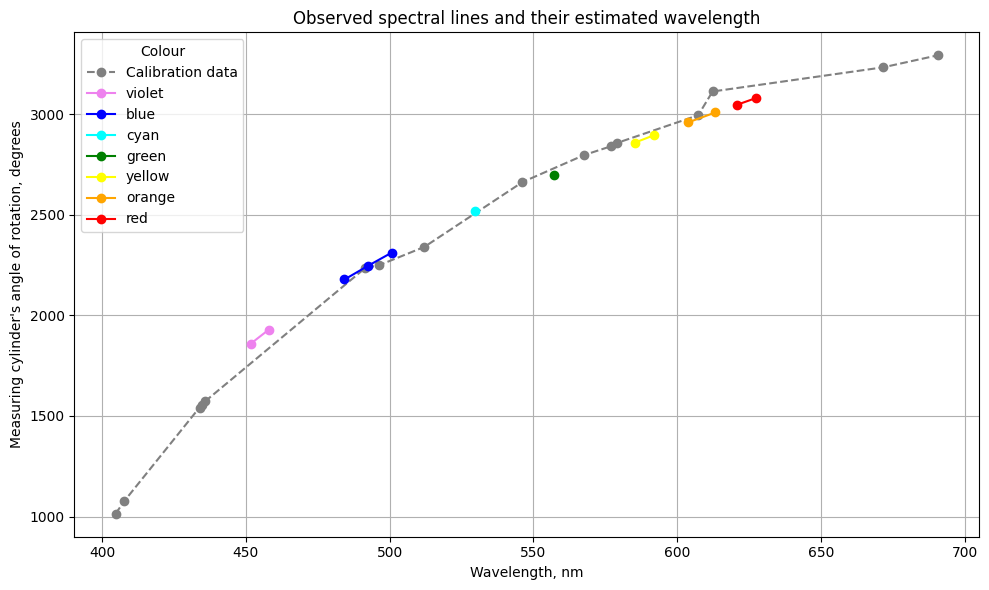

In [8]:
plt.figure(figsize=(10, 6))

plt.plot(
    spectrometer_wavelengths_df["wavelength_nm"],
    spectrometer_wavelengths_df["rotation_angle_deg"],
    marker="o", linestyle="--", color="gray", label="Calibration data"
)

for color in observed_df["colour"].unique():
    subset = observed_df[observed_df["colour"] == color]
    plt.plot(
        subset["predicted_wavelength_nm"],
        subset["rotation_angle_deg"],
        marker="o", linestyle="-", label=color, color=color
    )

plt.xlabel("Wavelength, nm")
plt.ylabel("Measuring cylinder's angle of rotation, degrees")
plt.title("Observed spectral lines and their estimated wavelength")
plt.legend(title="Colour")
plt.grid(True)
plt.tight_layout()
plt.show()

---

&nbsp;

### 3. Compare experimentally defined wavelengths with theoretically calculated.

From [the source](https://www.rp-photonics.com/standard_spectral_lines.html?utm_source=chatgpt.com), we can copy the theoretical visible wavelengths of mercury.


In [9]:
theory_df = pd.DataFrame({
    "wavelength_nm": [404.7, 435.8, 546.1, 577.0, 579.0, 623.0, 691.0],
    "colour": ["violet", "blue", "green", "yellow", "yellow", "orange", "red"],
})
theory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wavelength_nm  7 non-null      float64
 1   colour         7 non-null      object 
dtypes: float64(1), object(1)
memory usage: 244.0+ bytes


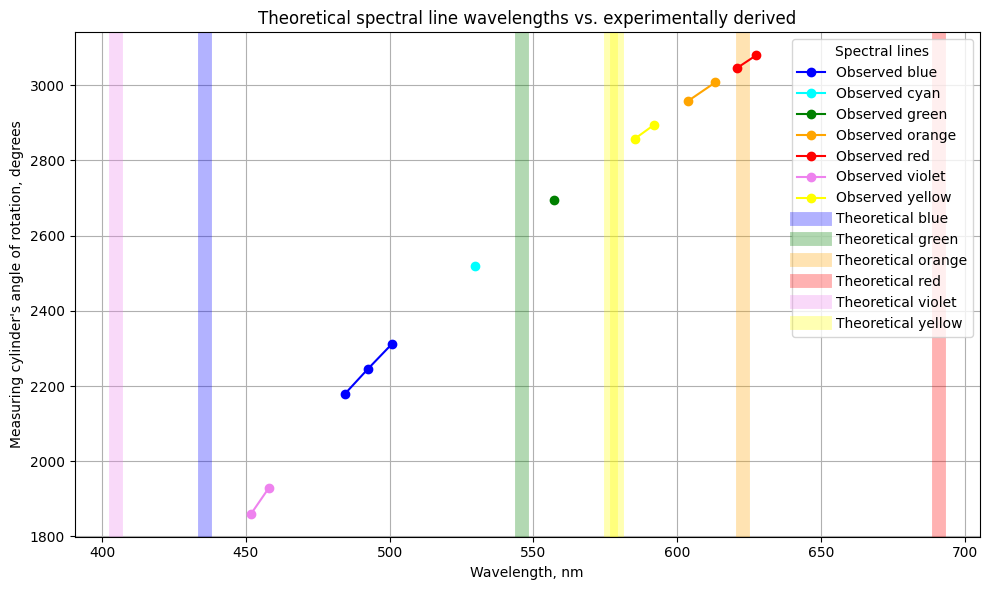

In [18]:
plt.figure(figsize=(10, 6))
from matplotlib.lines import Line2D

seen_colours = set()
for _, row in theory_df.iterrows():
    plt.axvline(
        x=row["wavelength_nm"],
        color=row["colour"],
        linewidth=10, alpha=0.3
    )
    seen_colours.add(row["colour"])

theoretical_handles = [
    Line2D([0], [0], color=color, linewidth=10, alpha=0.3, label=f"Theoretical {color}")
    for color in seen_colours
]

seen_points = []
for color in observed_df["colour"].unique():
    subset = observed_df[observed_df["colour"] == color]
    line, = plt.plot(
        subset["predicted_wavelength_nm"],
        subset["rotation_angle_deg"],
        marker="o", linestyle="-", label=f"Observed {color}", color=color
    )
    seen_points.append(line)

all_handles_sorted = sorted(theoretical_handles + seen_points, key=lambda h: h.get_label().lower())

plt.xlabel("Wavelength, nm")
plt.ylabel("Measuring cylinder's angle of rotation, degrees")
plt.title("Theoretical spectral line wavelengths vs. experimentally derived")
plt.legend(handles=all_handles_sorted, title="Spectral lines")
plt.grid(True)
plt.tight_layout()
plt.show()

The theoretical and experimentally derived wavelengths of mercury clearly do not match.

Although they resemble a somewhat similar pattern.

Next: re-map wavelength to theoretical values to see the expected trend.

/var/folders/nw/b03z_srn2h1_qknjr_t2_bvr0000gp/T/ipykernel_82323/166996098.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_observed_df = observed_df.groupby('colour') \


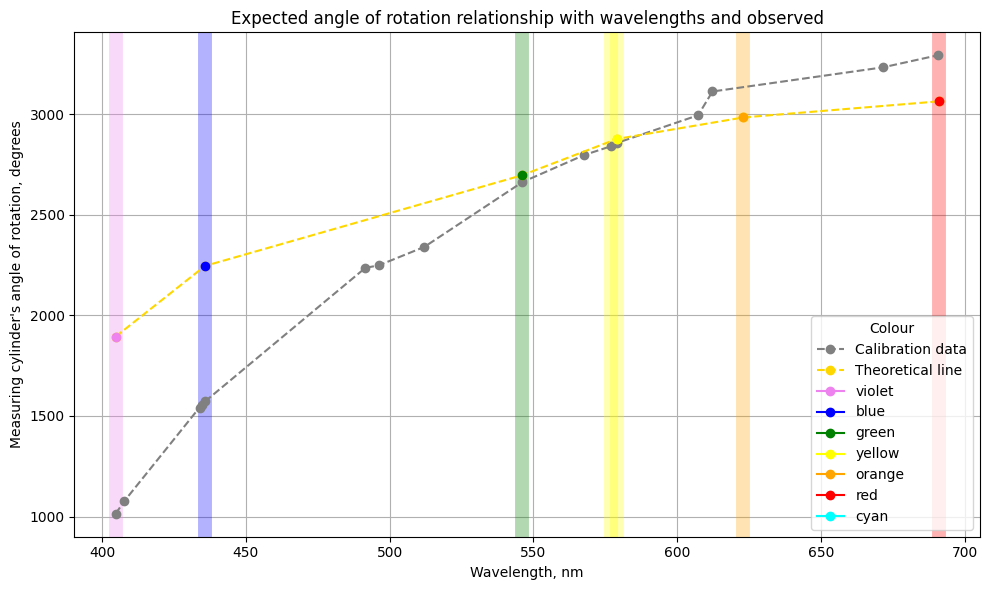

In [89]:
color_to_wavelength = theory_df.set_index("colour")["wavelength_nm"].to_dict()
avg_observed_df = observed_df.groupby("colour") \
    ["predicted_wavelength_nm", "rotation_angle_deg"].mean().reset_index()
avg_observed_df["theoretical_wavelength_nm"] = avg_observed_df["colour"].map(color_to_wavelength)
avg_observed_df.sort_values("theoretical_wavelength_nm", ascending=True, inplace=True)

plt.figure(figsize=(10, 6))

for _, row in theory_df.iterrows():
    plt.axvline(
        x=row["wavelength_nm"],
        color=row["colour"],
        linewidth=10, alpha=0.3
    )

plt.plot(
    spectrometer_wavelengths_df["wavelength_nm"],
    spectrometer_wavelengths_df["rotation_angle_deg"],
    marker="o", linestyle="--", color="gray", label="Calibration data"
)

plt.plot(
    avg_observed_df["theoretical_wavelength_nm"],
    avg_observed_df["rotation_angle_deg"],
    marker="o", linestyle="--", color="gold", label="Theoretical line"
)

for color in avg_observed_df["colour"]:
    subset = avg_observed_df[avg_observed_df["colour"] == color]
    plt.plot(
        subset["theoretical_wavelength_nm"],
        subset["rotation_angle_deg"],
        marker="o", linestyle="-", label=color, color=color
    )

plt.xlabel("Wavelength, nm")
plt.ylabel("Measuring cylinder's angle of rotation, degrees")
plt.title("Expected angle of rotation relationship with wavelengths and observed")
plt.legend(title="Colour")
plt.grid(True)
plt.tight_layout()
plt.show()

The error is significant. The experimentally derived model overpredicts at the lower wavelengths, while underpredicts at the higher wavelengths. Nevertheless, the predictions in the middle of the visible spectra are somewhat accurate.

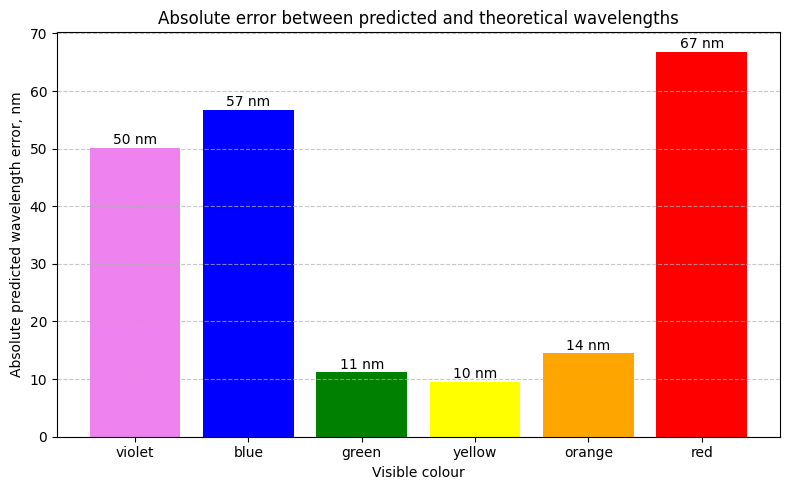

In [98]:
avg_observed_df["wavelength_error_nm"] = avg_observed_df["theoretical_wavelength_nm"] - avg_observed_df["predicted_wavelength_nm"]

avg_observed_df["wavelength_error_nm"] = avg_observed_df["wavelength_error_nm"].abs()
plt.figure(figsize=(8, 5))
bars = plt.bar(
    avg_observed_df["colour"],
    avg_observed_df["abs_error_nm"],
    color=avg_observed_df["colour"],
)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,
        f"{height:.0f} nm",
        ha="center", va="bottom", fontsize=10
    )
plt.xlabel("Visible colour")
plt.ylabel("Absolute predicted wavelength error, nm")
plt.title("Absolute error between predicted and theoretical wavelengths")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

---

&nbsp;

# Conclusions

* **The experimentally derived mercury spectra wavelengths resemble a similar pattern to the theoretically expected one.** Theoretically and experimentally derived relationships between wavelengths and rotation angles resembled a close-to-linear trend. The observed wavelengths are aligned in the expected pattern, starting from the violet visible spectra lines at 400ths nanometer wavelengths and ending at red spectra lines at 600ths nanometer wavelengths.

* **The experimentally derived wavelengths for green, yellow, and orange lines were under the 15-nanometer absolute error.** However, the violet, blue, and red lines were estimated with more than a 50-nanometer absolute error. Errors above 50nm are significantly inaccurate as the 50nm error even exceeds the theoretical length differences between visible lines.

* **Since both patterns resembled a close-to-linear trend, but the errors emerged symmetrically at the extremes of the visible spectra, a systematic issue appeared in the measurement process.** The pattern implies a consistent directional offset rather than random error. It is likely that the spectrometer used for the observations was improperly calibrated. Please check if the colimator is not misaligned, because it had likely lead to a consistent shift in the wavelength-to-angle relationship.
